Les données météos par région française sont divisées en 3 années: 2018, 2019, et 2020.

*** Import des librairies ***

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

Ici, on récupère les données à partir de dataset correspondant à chaque mois par année. Dans les colones, on retrouve la région, le jour, la température maximale en degrés celsus, la température minimale en degrés celsus, la vistesse du vent en km/h, le pourcentage d'humidité la visibilité en km et la couverture nuageuse.

In [3]:
M181 = pd.read_csv("nr_2018-01.csv")
M181

,region,day,TempMax_Deg,TempMin_Deg,Wind_kmh,Wet_percent,Visibility_km,CloudCoverage_percent
0,Bourgogne-Franche-Comté,2018/01/01,7.5,5.0,35.5,87.0,9.0625,79.5
1,Bourgogne-Franche-Comté,2018/01/02,5.5,4.5,20.0,91.0,9.5000,92.5
2,Bourgogne-Franche-Comté,2018/01/03,11.5,7.5,47.0,77.0,8.6250,77.5
3,Bourgogne-Franche-Comté,2018/01/04,12.5,11.0,34.5,92.5,8.3750,99.5
4,Bourgogne-Franche-Comté,2018/01/05,11.5,10.0,25.0,92.5,8.6250,80.5
...,...,...,...,...,...,...,...,...
367,Île-de-France,2018/01/27,8.0,4.0,14.0,88.0,10.0000,27.0
368,Île-de-France,2018/01/28,10.0,7.0,15.0,94.0,7.0000,95.0
369,Île-de-France,2018/01/29,11.0,9.0,15.0,91.0,9.0000,96.0
370,Île-de-France,2018/01/30,10.0,8.0,13.0,91.0,8.0000,78.0


In [4]:
M182 = pd.read_csv("nr_2018-02.csv")
M183 = pd.read_csv("nr_2018-03.csv")
M184 = pd.read_csv("nr_2018-04.csv")
M185 = pd.read_csv("nr_2018-05.csv")
M186 = pd.read_csv("nr_2018-06.csv")
M187 = pd.read_csv("nr_2018-07.csv")
M188 = pd.read_csv("nr_2018-08.csv")
M189 = pd.read_csv("nr_2018-09.csv")
M1810 = pd.read_csv("nr_2018-10.csv")
M1811 = pd.read_csv("nr_2018-11.csv")
M1812 = pd.read_csv("nr_2018-12.csv")

On concatène les datasets pour représenter l'année.

In [5]:
M2018 = pd.concat([M181, M182, M183, M184, M185, M186, M187, M188, M189, M1810, M1811, M1812])
M2018

,region,day,TempMax_Deg,TempMin_Deg,Wind_kmh,Wet_percent,Visibility_km,CloudCoverage_percent
0,Bourgogne-Franche-Comté,2018/01/01,7.5,5.0,35.5,87.0,9.0625,79.5
1,Bourgogne-Franche-Comté,2018/01/02,5.5,4.5,20.0,91.0,9.5000,92.5
2,Bourgogne-Franche-Comté,2018/01/03,11.5,7.5,47.0,77.0,8.6250,77.5
3,Bourgogne-Franche-Comté,2018/01/04,12.5,11.0,34.5,92.5,8.3750,99.5
4,Bourgogne-Franche-Comté,2018/01/05,11.5,10.0,25.0,92.5,8.6250,80.5
...,...,...,...,...,...,...,...,...
367,Île-de-France,2018/12/27,3.0,1.0,8.0,53.0,10.0000,50.0
368,Île-de-France,2018/12/28,3.0,0.0,5.0,43.0,10.0000,25.0
369,Île-de-France,2018/12/29,5.0,2.0,12.0,90.0,9.0000,88.0
370,Île-de-France,2018/12/30,7.0,5.0,7.0,97.0,3.5000,81.0


En concaténant les datasets, on a 4380 lignes pour 8 colonnes. On vérifie qu'il n'y a pas de valeurs manquantes.

<AxesSubplot:>

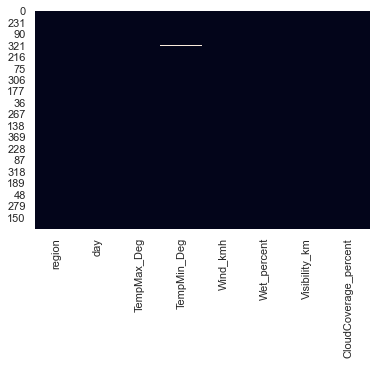

In [6]:
sns.heatmap(M2018.isna(), cbar=False)

In [7]:
M2018.to_csv("Météo en 2018") #pour sauvegarder les données

In [8]:
M2018.describe()

,TempMax_Deg,TempMin_Deg,Wind_kmh,Wet_percent,Visibility_km,CloudCoverage_percent
count,4380.000000,4376.000000,4380.000000,4380.000000,4380.000000,4380.000000
mean,16.744787,13.398157,17.307572,74.794521,9.332563,40.287785
std,7.541743,7.251300,8.409428,13.035237,0.997599,27.982232
min,-4.500000,-7.500000,2.500000,29.000000,2.750000,0.000000
25%,11.000000,8.000000,11.000000,65.500000,9.000000,15.000000
50%,16.000000,13.000000,15.000000,76.000000,9.875000,37.000000
75%,23.000000,19.000000,22.000000,85.333333,10.000000,62.375000
max,36.000000,31.000000,61.000000,100.000000,10.000000,100.000000


Température maximale moyenne en 2018 : environ 16.7 ° C
Température minimale moyenne en 2018 : environ 13.4 ° C
Vitesse moyenne du vent en 2018 : environ 17.31 km/h
Pourcentage d'humidité moyen en 2018 : environ 74.8 %
Visibilité moyenne en 2018 : 9.33 km
Pourcentage moyen de couverture nuageuse : environ 40.29 %

                       TempMax_Deg  TempMin_Deg  Wind_kmh  Wet_percent  \
TempMax_Deg               1.000000     0.978399 -0.263833    -0.484515   
TempMin_Deg               0.978399     1.000000 -0.248914    -0.467878   
Wind_kmh                 -0.263833    -0.248914  1.000000     0.153380   
Wet_percent              -0.484515    -0.467878  0.153380     1.000000   
Visibility_km             0.216739     0.201597  0.098744    -0.506554   
CloudCoverage_percent    -0.502951    -0.456478  0.298840     0.696316   

                       Visibility_km  CloudCoverage_percent  
TempMax_Deg                 0.216739              -0.502951  
TempMin_Deg                 0.201597              -0.456478  
Wind_kmh                    0.098744               0.298840  
Wet_percent                -0.506554               0.696316  
Visibility_km               1.000000              -0.468981  
CloudCoverage_percent      -0.468981               1.000000  


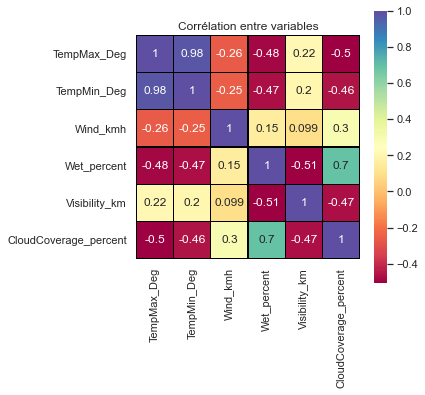

In [9]:
Corr = M2018.corr()
print(Corr)

f, ax = plt.subplots(figsize=(5,5))
plt.title('Corrélation entre variables')


sns.heatmap(Corr,linewidths=0.25,vmax=1.0, square=True, cmap="Spectral", linecolor='black', annot=True)
plt.show()

On remarque dans la matrice, que les températures maximales et minimales sont fortement corrélées. Il y a une forte corrélation entre le pourcentage d'humidité et le pourcentage de couverture nuageuse.

In [10]:
M191 = pd.read_csv("nr_2019-01.csv")
M192 = pd.read_csv("nr_2019-02.csv")
M193 = pd.read_csv("nr_2019-03.csv")
M194 = pd.read_csv("nr_2019-04.csv")
M195 = pd.read_csv("nr_2019-05.csv")
M196 = pd.read_csv("nr_2019-06.csv")
M197 = pd.read_csv("nr_2019-07.csv")
M198 = pd.read_csv("nr_2019-08.csv")
M199 = pd.read_csv("nr_2019-09.csv")
M1910 = pd.read_csv("nr_2019-10.csv")
M1911 = pd.read_csv("nr_2019-11.csv")
M1912 = pd.read_csv("nr_2019-12.csv")

In [11]:
M2019 = pd.concat([M191, M192, M193, M194, M195, M196, M197, M198, M199, M1910, M1911, M1912])
M2019

,region,day,TempMax_Deg,TempMin_Deg,Wind_kmh,Wet_percent,Visibility_km,CloudCoverage_percent
0,Bourgogne-Franche-Comté,2019/01/01,5.0,3.0,6.0,94.0,5.3750,83.0
1,Bourgogne-Franche-Comté,2019/01/02,4.0,2.0,15.0,87.5,8.1875,47.5
2,Bourgogne-Franche-Comté,2019/01/03,3.0,-0.5,15.5,79.0,10.0000,7.0
3,Bourgogne-Franche-Comté,2019/01/04,3.5,0.0,16.0,85.0,9.3750,27.5
4,Bourgogne-Franche-Comté,2019/01/05,2.5,0.0,9.0,88.5,6.4375,90.5
...,...,...,...,...,...,...,...,...
367,Île-de-France,2019/12/27,11.0,9.0,15.0,88.0,8.0000,71.0
368,Île-de-France,2019/12/28,8.0,5.0,9.0,90.0,9.0000,26.0
369,Île-de-France,2019/12/29,7.0,3.0,6.0,71.0,10.0000,10.0
370,Île-de-France,2019/12/30,11.0,4.0,6.0,51.0,10.0000,7.0


In [12]:
M2019.to_csv("Météo en 2019")

In [13]:
M2019.describe()

,TempMax_Deg,TempMin_Deg,Wind_kmh,Wet_percent,Visibility_km,CloudCoverage_percent
count,4380.000000,4379.000000,4380.000000,4380.000000,4380.000000,4379.000000
mean,16.778995,12.801210,17.636530,75.194559,9.678605,45.868273
std,7.127210,6.649427,8.539533,12.703805,2.144674,29.003540
min,-2.000000,-5.500000,2.000000,26.000000,2.125000,0.000000
25%,11.000000,8.000000,11.500000,66.458333,8.750000,19.000000
50%,16.000000,12.000000,16.000000,77.000000,9.875000,47.000000
75%,22.000000,17.500000,22.000000,85.000000,10.000000,71.000000
max,41.000000,32.000000,67.000000,100.000000,20.000000,100.000000


                       TempMax_Deg  TempMin_Deg  Wind_kmh  Wet_percent  \
TempMax_Deg               1.000000     0.954283 -0.156611    -0.559558   
TempMin_Deg               0.954283     1.000000 -0.071778    -0.516312   
Wind_kmh                 -0.156611    -0.071778  1.000000     0.095270   
Wet_percent              -0.559558    -0.516312  0.095270     1.000000   
Visibility_km             0.177419     0.124993 -0.091063    -0.306526   
CloudCoverage_percent    -0.468811    -0.347301  0.302756     0.666581   

                       Visibility_km  CloudCoverage_percent  
TempMax_Deg                 0.177419              -0.468811  
TempMin_Deg                 0.124993              -0.347301  
Wind_kmh                   -0.091063               0.302756  
Wet_percent                -0.306526               0.666581  
Visibility_km               1.000000              -0.399791  
CloudCoverage_percent      -0.399791               1.000000  


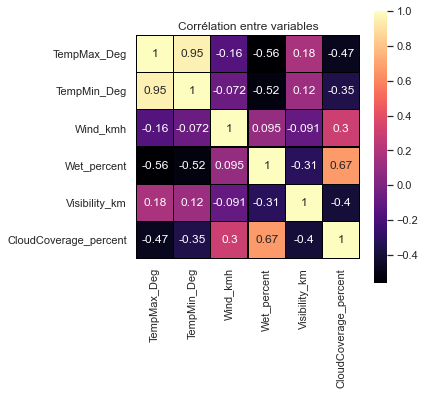

In [15]:
Corr = M2019.corr()
print(Corr)

f, ax = plt.subplots(figsize=(5,5))
plt.title('Corrélation entre variables')


sns.heatmap(Corr,linewidths=0.25,vmax=1.0, square=True, cmap="magma", linecolor='black', annot=True)
plt.show()

In [18]:
M201 = pd.read_csv("nr_2020-01.csv")
M202 = pd.read_csv("nr_2020-02.csv")
M203 = pd.read_csv("nr_2020-03.csv")
M204 = pd.read_csv("nr_2020-04.csv")
M205 = pd.read_csv("nr_2020-05.csv")
M206 = pd.read_csv("nr_2020-06.csv")
M207 = pd.read_csv("nr_2020-07.csv")
M208 = pd.read_csv("nr_2020-08.csv")
M209 = pd.read_csv("nr_2020-09.csv")
M2010 = pd.read_csv("nr_2020-10.csv")
M2011 = pd.read_csv("nr_2020-11.csv")
M2012 = pd.read_csv("nr_2020-12.csv")

In [19]:
M2020 = pd.concat([M201, M202, M203, M204, M205, M206, M207, M208, M209, M2010, M2011, M2012])
M2020

,region,day,TempMax_Deg,TempMin_Deg,Wind_kmh,Wet_percent,Visibility_km,CloudCoverage_percent
0,Bourgogne-Franche-Comté,2020/01/01,4.5,1.0,6.0,81.5,9.6875,22.0
1,Bourgogne-Franche-Comté,2020/01/02,5.5,2.0,10.0,87.5,8.8125,53.0
2,Bourgogne-Franche-Comté,2020/01/03,7.0,4.0,17.0,91.5,8.3750,96.0
3,Bourgogne-Franche-Comté,2020/01/04,6.5,5.0,9.0,90.5,7.7500,49.5
4,Bourgogne-Franche-Comté,2020/01/05,5.5,2.5,15.5,88.5,9.5000,24.5
...,...,...,...,...,...,...,...,...
367,Île-de-France,2020/12/27,8.0,7.0,43.0,82.0,8.1250,98.0
368,Île-de-France,2020/12/28,5.0,4.0,22.0,79.0,8.5000,82.0
369,Île-de-France,2020/12/29,5.0,3.0,17.0,89.0,7.3750,94.0
370,Île-de-France,2020/12/30,6.0,2.0,13.0,88.0,10.0000,88.0


In [20]:
M2020.to_csv("Météo en 2020")

In [21]:
M2020.describe()

,TempMax_Deg,TempMin_Deg,Wind_kmh,Wet_percent,Visibility_km,CloudCoverage_percent
count,4392.000000,4390.000000,4392.000000,4392.000000,4392.000000,4392.000000
mean,16.941295,11.681663,18.187007,81.067964,9.334078,46.825630
std,6.782559,5.415974,8.852711,11.010125,0.946522,29.191546
min,2.500000,-2.500000,3.000000,38.000000,3.000000,0.000000
25%,12.000000,8.000000,12.000000,74.500000,8.937500,19.000000
50%,16.000000,12.000000,16.500000,84.000000,9.875000,49.000000
75%,22.000000,15.000000,23.000000,90.000000,10.000000,72.000000
max,38.000000,29.000000,59.000000,99.000000,10.000000,100.000000


                       TempMax_Deg  TempMin_Deg  Wind_kmh  Wet_percent  \
TempMax_Deg               1.000000     0.908127 -0.249108    -0.327189   
TempMin_Deg               0.908127     1.000000 -0.122953    -0.345954   
Wind_kmh                 -0.249108    -0.122953  1.000000     0.024141   
Wet_percent              -0.327189    -0.345954  0.024141     1.000000   
Visibility_km             0.268127     0.195928 -0.160018    -0.480579   
CloudCoverage_percent    -0.429879    -0.270631  0.330535     0.567567   

                       Visibility_km  CloudCoverage_percent  
TempMax_Deg                 0.268127              -0.429879  
TempMin_Deg                 0.195928              -0.270631  
Wind_kmh                   -0.160018               0.330535  
Wet_percent                -0.480579               0.567567  
Visibility_km               1.000000              -0.576786  
CloudCoverage_percent      -0.576786               1.000000  


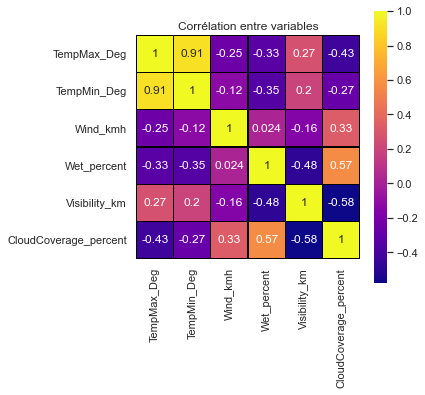

In [22]:
Corr = M2020.corr()
print(Corr)

f, ax = plt.subplots(figsize=(5,5))
plt.title('Corrélation entre variables')


sns.heatmap(Corr,linewidths=0.25,vmax=1.0, square=True, cmap="plasma", linecolor='black', annot=True)
plt.show()

In [25]:
résultats={'Température maximale moyenne en °C':[16.74,16.78,16.94], 
           'Température minimale moyenne en °C':[13.40,12.80,11.68], 
           'Vitesse moyenne du vent en km/h':[17.31,17.64,18.19],
           "Pourcentage d'humidité moyen en %": [74.79,75.19,81.07],
           'Visibilité moyenne en km' :[9.33,9.68,9.33], 
           'Pourcentage moyen de couverture nuageuse en %':[40.29,45.87,46.83]}
résultats

{'Température maximale moyenne en °C': [16.74, 16.78, 16.94],
 'Température minimale moyenne en °C': [13.4, 12.8, 11.68],
 'Vitesse moyenne du vent en km/h': [17.31, 17.64, 18.19],
 "Pourcentage d'humidité moyen en %": [74.79, 75.19, 81.07],
 'Visibilité moyenne en km': [9.33, 9.68, 9.33],
 'Pourcentage moyen de couverture nuageuse en %': [40.29, 45.87, 46.83]}

In [26]:
DATAM = pd.DataFrame(résultats, index=['2018', '2019', '2020'])
DATAM

,Température maximale moyenne en °C,Température minimale moyenne en °C,Vitesse moyenne du vent en km/h,Pourcentage d'humidité moyen en %,Visibilité moyenne en km,Pourcentage moyen de couverture nuageuse en %
2018,16.74,13.40,17.31,74.79,9.33,40.29
2019,16.78,12.80,17.64,75.19,9.68,45.87
2020,16.94,11.68,18.19,81.07,9.33,46.83


In [28]:
météo = pd.concat([M2018, M2019, M2020])
météo

,region,day,TempMax_Deg,TempMin_Deg,Wind_kmh,Wet_percent,Visibility_km,CloudCoverage_percent
0,Bourgogne-Franche-Comté,2018/01/01,7.5,5.0,35.5,87.0,9.0625,79.5
1,Bourgogne-Franche-Comté,2018/01/02,5.5,4.5,20.0,91.0,9.5000,92.5
2,Bourgogne-Franche-Comté,2018/01/03,11.5,7.5,47.0,77.0,8.6250,77.5
3,Bourgogne-Franche-Comté,2018/01/04,12.5,11.0,34.5,92.5,8.3750,99.5
4,Bourgogne-Franche-Comté,2018/01/05,11.5,10.0,25.0,92.5,8.6250,80.5
...,...,...,...,...,...,...,...,...
367,Île-de-France,2020/12/27,8.0,7.0,43.0,82.0,8.1250,98.0
368,Île-de-France,2020/12/28,5.0,4.0,22.0,79.0,8.5000,82.0
369,Île-de-France,2020/12/29,5.0,3.0,17.0,89.0,7.3750,94.0
370,Île-de-France,2020/12/30,6.0,2.0,13.0,88.0,10.0000,88.0


In [29]:
météo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13152 entries, 0 to 371
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   region                 13152 non-null  object 
 1   day                    13152 non-null  object 
 2   TempMax_Deg            13152 non-null  float64
 3   TempMin_Deg            13145 non-null  float64
 4   Wind_kmh               13152 non-null  float64
 5   Wet_percent            13152 non-null  float64
 6   Visibility_km          13152 non-null  float64
 7   CloudCoverage_percent  13151 non-null  float64
dtypes: float64(6), object(2)
memory usage: 924.8+ KB


In [30]:
météo.isnull().sum()

region                   0
day                      0
TempMax_Deg              0
TempMin_Deg              7
Wind_kmh                 0
Wet_percent              0
Visibility_km            0
CloudCoverage_percent    1
dtype: int64

In [32]:
percent_missing = météo.isnull().sum() * 100 / len(météo)
percent_missing

region                   0.000000
day                      0.000000
TempMax_Deg              0.000000
TempMin_Deg              0.053224
Wind_kmh                 0.000000
Wet_percent              0.000000
Visibility_km            0.000000
CloudCoverage_percent    0.007603
dtype: float64

In [33]:
météo.to_csv("Météo en France de 2018 à 2020")

In [34]:
météo.describe()

,TempMax_Deg,TempMin_Deg,Wind_kmh,Wet_percent,Visibility_km,CloudCoverage_percent
count,13152.000000,13145.000000,13152.000000,13152.000000,13152.000000,13151.000000
mean,16.821802,12.626043,17.710804,77.022709,9.448311,44.329392
std,7.156873,6.521514,8.609800,12.610475,1.479384,28.873179
min,-4.500000,-7.500000,2.000000,26.000000,2.125000,0.000000
25%,11.000000,8.000000,11.500000,68.500000,8.875000,17.500000
50%,16.000000,12.000000,16.000000,79.000000,9.875000,44.000000
75%,22.000000,17.000000,22.000000,87.000000,10.000000,69.000000
max,41.000000,32.000000,67.000000,100.000000,20.000000,100.000000


                       TempMax_Deg  TempMin_Deg  Wind_kmh  Wet_percent  \
TempMax_Deg               1.000000     0.941728 -0.222484    -0.450339   
TempMin_Deg               0.941728     1.000000 -0.153837    -0.463150   
Wind_kmh                 -0.222484    -0.153837  1.000000     0.099595   
Wet_percent              -0.450339    -0.463150  0.099595     1.000000   
Visibility_km             0.190395     0.148640 -0.057745    -0.367454   
CloudCoverage_percent    -0.463841    -0.367295  0.312993     0.639094   

                       Visibility_km  CloudCoverage_percent  
TempMax_Deg                 0.190395              -0.463841  
TempMin_Deg                 0.148640              -0.367295  
Wind_kmh                   -0.057745               0.312993  
Wet_percent                -0.367454               0.639094  
Visibility_km               1.000000              -0.416305  
CloudCoverage_percent      -0.416305               1.000000  


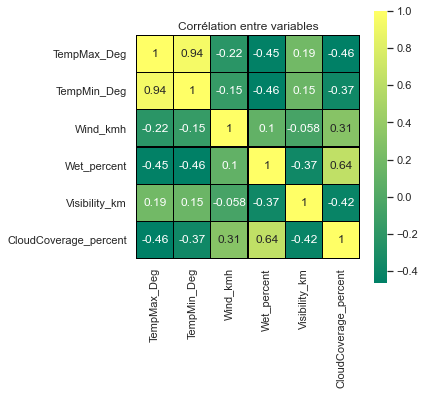

In [36]:
Corr = météo.corr()
print(Corr)

f, ax = plt.subplots(figsize=(5,5))
plt.title('Corrélation entre variables')


sns.heatmap(Corr,linewidths=0.25,vmax=1.0, square=True, cmap="summer", linecolor='black', annot=True)
plt.show()